# **SEISMOGRAMME (WELLENFORMEN)**
Willkommen zum Jupyter-Notebook "*Seismogramme (Wellenformen)*" welches im Rahmen des *seismo-at-school* Projektes am Schweizerischen Erdbebendienst ([SED](http://seismo.ethz.ch/de/home/)) an der ETH Zürich in Zusammenarbeit mit der Universität Lausanne und dem Centre Pédagogique Prévention Séisme (CPPS) in Sion entwickelt wurde.

---
---

Um den nachfolgenden Python-Code auszuführen, gehe auf die Menuleiste oben und klicke unter Menupunkt **"Laufzeit" (engl. "Runtime")** **"Alle ausführen (engl. "Run all")"** und dann **"Sitzung neustarten und alle ausführen" (engl. "Restart session and run all")**".

Du solltest nach einigen Sekunden unten Ergebnisse sehen. Wenn Du willst, kannst Du einzelne Parameter, wie zum Beispiel die minimale Magnitude, ändern und den Code erneut ausführen. **Bitte klicke dazu jeweils auf den Pfeil oben links in der jeweiligen grauen Box.**

Viel Vergnügen!


In [ ]:
# @title
import warnings
warnings.filterwarnings("ignore")
try:
    import obspy
except:
    !pip install obspy | grep -v 'already satisfied'

try:
    import cartopy
except:
    !pip install cartopy | grep -v 'already satisfied'

import numpy as np
import obspy
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime, Stream, Trace, Stats
from obspy.taup import TauPyModel
from obspy.geodetics import gps2dist_azimuth
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
model = TauPyModel(model="iasp91") # theoretische Ankunftszeiten von Wellenphasen

# SED CH Network:
inv_ch = Client("ETH").get_stations(network="CH", station="*", location="--", channel="HH*", level="RESP")
inv_ch = inv_ch.select(channel="*Z", station="*", time=obspy.UTCDateTime("2050-01-01T01:00:00.000Z"))

# School Network:
inv_s = Client("ETH").get_stations(network="S", station="*",location="--", channel="EH*", level="RESP")
inv_s = inv_s.select(channel="*Z", station="*", time=obspy.UTCDateTime("2050-01-01T01:00:00.000Z"))

print("Ich habe " + str(len(inv_ch[0])) + " CH Breitband-Stationen und " + str(len(inv_s[0])) + " S Stationen gefunden.")

Ich habe 70 CH Breitband-Stationen und 24 S Stationen gefunden.



Die Seismologie befasst sich mit seismischen Wellen. Das sind Wellen akustischer Energie, die sich in der Erde ausbreiten. Natürliche Seismizität wird durch Erdbeben, vulkanische Aktivitäten oder extreme Wetterereignisse verursacht. Die vom Menschen verursachte Seismizität - die sogenannte *induzierte* oder *anthropogene* Seismizität - kann durch Maschinen, Explosionen, Geothermie oder Fracking verursacht werden. Seismische Wellen werden mithilfe von *Seismometern* gemessen. Seismometer messen Erdbeben auf der ganzen Welt. Die *Seismogramme*, auch Wellenformen genannt, werden von Seismologen und Seismologinnen ausgewertet. Versuche es doch auch einmal!


## **Aufgabe:**
Wie unterscheiden sich die Seismogramme von einem nahen Beben, beispielsweise in der Schweiz (*type*= "local"), und von einem weit entfernten Beben irgendwo anders auf der Welt (*type*= "global")? Wähle im Feld unten ein beliebiges Jahr (*year*) und eine minimale und maximale Magnitude (*minmag* und *maxmag*) aus.

**Beispiel:**

Für ein Erdbeben irgendwo auf der Welt:

> *type* = "global"

> *year*   = 2024

> *minmag* = 6.0

> *maxmag* = 9.0


Für ein Erdbeben in der Schweiz:

> *type* = "local"

> *year*   = 2024

> *minmag* = 2.5

> *maxmag* = 6.0

In [ ]:
# Diese Parameter kannst Du ändern:

# 1. Lokale Erdbeben:
#type = "local"  # type = "local". -- in der Schweiz oder grenznahen Ausland
#year   = 2024   # z.B. year = 2024
#minmag = 2.5    # z.B. minmag = 2.5
#maxmag = 6.0    # z.B. maxmag = 6.0

# 2. Teleseismische Erdbeben:
type = "global" # type = "global" -- irgendwo auf der Welt
year   = 2024   # z.B. year = 2024
minmag = 7.0    # z.B. minmag = 7.0
maxmag = 8.0    # z.B. maxmag = 8.0

In [ ]:
# @title
# Diesen Code solltest Du nicht verändern:

try:
  if type=="global" and minmag>=1.5 and year>=2023:
    cat = Client("IRIS").get_events(minmag=minmag, maxmag=maxmag, starttime=obspy.UTCDateTime(str(year) + "-01-01T00:00"), endtime=obspy.UTCDateTime(str(year+1) + "-01-01T00:00"))
    print("Ich habe " + str(len(cat)) +" Erdbeben mit einer Magnitude zwischen " +str(minmag)+ " bis " +str(maxmag)+ " gefunden.")
    print(cat.__str__(print_all=True))
  elif type=="local" and minmag>=1.0 and year>=2017:
    cat = Client("ETH").get_events(minmag=minmag, maxmag=maxmag, starttime=obspy.UTCDateTime(str(year) + "-01-01T00:00"), endtime=obspy.UTCDateTime(str(year+1) + "-01-01T00:00"))
    print("Ich habe " + str(len(cat)) +" Erdbeben mit einer Magnitude zwischen " +str(minmag)+ " bis " +str(maxmag)+ " gefunden.")
    print(cat.__str__(print_all=True))
  else:
    print("Bitte wähle eine grössere Magnitude, damit das Erdbeben in den Seismogrammen gut sichtbar ist.")
except:
  print("Ich habe keine Erdbeben gefunden. Aendere Deine Parameter und versuche es noch einmal.")

Ich habe 3 Erdbeben mit einer Magnitude zwischen 7.0 bis 8.0 gefunden.
3 Event(s) in Catalog:
2024-04-02T23:58:11.228000Z | +23.819, +121.562 | 7.4  mww
2024-01-22T18:09:04.408000Z | +41.263,  +78.653 | 7.0  Mww
2024-01-01T07:10:09.474000Z | +37.489, +137.264 | 7.5  mww


Kopiere aus dem Erdbebenkatalog aus Deiner vorherigen Suche oben die Herdzeit (linke Spalte), d.h. die Zeit, an der sich das Erdbeben ereignet hat, von  einem beliebigen Erdbeben in das Feld unten (z.B. *origin_time*=obspy.UTCDateTime("2024-02-27T01:21:42.685602Z")):

In [ ]:
# Diesen Parameter kannst Du ändern:
origin_time=obspy.UTCDateTime("2024-04-02T23:58:11.228000Z")







¨# M7.4  Taiwan





#origin_time=obspy.UTCDateTime("2024-02-27T01:21:42.685602Z")  # M3.4 Jura
#origin_time=obspy.UTCDateTime("2024-04-22T01:35:55.246216Z") # M3.8
#origin_time=obspy.UTCDateTime("2017-07-01T08:10:34.076731Z") # M4.3 Lintal?
#origin_time=obspy.UTCDateTime("2024-04-17T03:51:14.916189Z") # M2.9 Mulhouse
#origin_time=obspy.UTCDateTime("2024-03-27T21:19:37.332000Z")  # M4.4 Italy
#origin_time=obspy.UTCDateTime("2024-03-18T15:52:47.694063Z")  # M3.1 Bosco/Gurin TI
#origin_time=obspy.UTCDateTime("2024-03-15T05:19:33.541611Z")  # M2.6 Montreux
#origin_time=obspy.UTCDateTime("2024-01-01T07:10:09.474000Z")  # M7.5 Japan


In [ ]:
# @title
# Diesen Code solltest Du nicht verändern:

try:
  if type == "global":
    cat = Client("IRIS").get_events(minmag=minmag, starttime=obspy.UTCDateTime(origin_time-5), endtime=obspy.UTCDateTime(origin_time+5))
  else:
    cat = Client("ETH").get_events(minmag=minmag, starttime=obspy.UTCDateTime(origin_time-5), endtime=obspy.UTCDateTime(origin_time+5))
  #cat.plot()

  eq_lat = cat[0].origins[0].latitude
  eq_lon = cat[0].origins[0].longitude
  eq_depth = cat[0].origins[0].depth/1000
  eq_mag = cat[0].magnitudes[0].mag


  print("Das Erdbeben ereigenete sich an Länge = " +str(eq_lat) +
        " Grad und Breite = " + str(eq_lon) + " Grad. Es hatte eine Tiefe von " + str(eq_depth) + " km und eine Magnitude von " +str(eq_mag) +".")
except:
  print("Ich habe kein Beben finden können. Probiere es nocheinmal mit einer anderen Herdzeit.")

Das Erdbeben ereigenete sich an Länge = 23.819 Grad und Breite = 121.5616 Grad. Es hatte eine Tiefe von 34.75 km und eine Magnitude von 7.4.


Habt ihr ein RaspberryShake Seismometer an Eurer Schule? Entferne einfach "#" für Euren Sensor aus der folgenden Liste (z. B. *rs_station* = ["KSSO", "RFE6B", "MOUTI"])?

In [ ]:
# Diesen Parameter kannst Du ändern:

# 3D RaspberryShake Schul-Seismometer:
rs_station = ["KSSO","RFE6B", "MOUTI"]      # KS Solothurn,                     bernhard.marti@ksso.ch, nathalie.meier@ksso.ch
#rs_station = ["MNGRZ","R7DBB", "ZUR"]      # MNG Rämibühl,                     philipp.ruedisuehli@mng.ch
#rs_station = ["KSZUG","R3BE0", "ZUR"]      # KS Zug,                           Martin.Rohmann@ksz.ch
#rs_station = ["KSCHR","RB22F", "PLONS"]    # Bündner KS Chur,                  Stefan.reusser@bks-campus.ch
#rs_station = ["KSRYC","RF726", "WILA"]     # KS Rychenberg Winterthur,         David Guntli (Geographie), gg.sammlung@gmail.com; IT: andreas.berger@krw.ch
#rs_station = ["KSKNZ","RC23B", "ZUR"]      # KS Küsnacht,                      thierry.joerin@kkn.ch
#rs_station = ["KSHOZ","RE5E7", "ZUR"]      # KS Hottingen	Zürich,             irene.meier@ksh.ch
#rs_station = ["KSURI","R8F49", "MUO"]      # KS Uri,                           adrian.zgraggen@kmsu.ch
#rs_station = ["KSROM","R58D2", "WALHA"]    # KS Romanshorn,                    Karin Keller, klk@ksr.ch
#rs_station = ["KSZOW","RF726", "WILA"]     # KS Zürcher Oberland, Wetzikon,    silvan.rusch@kzo.ch
#rs_station = ["GUSTZ","R4335", "ZUR"]      # Gymnasium Unterstrass,            stefan.hesske@unterstrass.edu
#rs_station = ["GOBZL","R19BB", "BALST"]    # Gymnasium Oberaargau,             Stefan.Naef@bzl.ch
#rs_station = ["GLSTL","RDFB5", "MUTEZ"]    # Gymnasium Liestal,                peter.abegglen@sbl.ch



#rs_station = ["GBIEL","R8C09"]             # OFFLINE Gymnasium Biel-Seeland	Biel, sabrina.rupp@gbsl.ch
#rs_station = ["KSENZ","RD3C4"]             # OFFLINE Kantonsschule Enge Zürich, ursina.gloor@ken.ch
#rs_station = ["KSOBW","RDFB5"]             # OFFLINE Gymnasium Oberwil, aideen.mitterer-oeri@sbl.ch

# ==========================================================
# 1D RaspberryShake (Romandie): 25
#rs_station = ["ESNYM","R5D35"]  # OFFLINE ES Nyon-Marens
#rs_station = ["EPSBE","R65E9"]  # OFFLINE EPS de Begnins – L'Esplanade
#rs_station = ["ESLAS","R8E4D"]  # OFFLINE ES de La Sarraz et environs
#rs_station = ["EPSGD","R3B57"]  # EPS Grandson -- NO DATA?
#rs_station = ["ESTSE","R52F7"]  # OFFLINE ES des Trois-Sapins
#rs_station = ["ESPEC","R46E5"]  # OFFLINE ES du Pays-d'Enhaut
#rs_station = ["EPSOL","RE4DE"]  # OFFLINE EPS Les Ormonts-Leysin
#rs_station = ["EPSVP","RF727"]  # OFFLINE EPSCL Collège du Verney
#rs_station = ["EPSLE","R5BF0"]  # OFFLINE Collège/EPS de l'Elysée
#rs_station = ["EPSLB","R0CD2"]  # OFFLINE EPS Bergières
#rs_station = ["EDILA","RC676"]  # partner institution (EDI LAUSANNE)
#rs_station = ["CLREN","R3BDC"]  # OFFLINE Collège du Léman
#rs_station = ["EPSEC","R8710"]  # OFFLINE EPS Ecublens
#rs_station = ["ESSTI","R1F5E"]  # OFFLINE ES St-Imier
#rs_station = ["COPCM","RA83F"]  # OFFLINE CO des Perraires
#rs_station = ["EAMCX","S7A06"]  # Ecole de l'Arpille
#rs_station = ["COORS","S3900"]  # CO Orsières
#rs_station = ["COLEY","RA7C7"]  # CO Leytron
#rs_station = ["COHEU","RB289"]  # CO Hérens -- NO DATA?
#rs_station = ["COAVI","RA652"]  # CO d'Anniviers
#rs_station = ["COLSL","RE4EF"]  # OFFLINE CO des Liddes
#rs_station = ["COAYT","RB15C"]  # CO Ayent -- NO DATA? -- VERY NOISY!!!
#rs_station = ["COSAV","R2D50"]  # CO Savièse -- NO DATA?
#rs_station = ["COSTG","R7694"]  # CO St-Guérin
#rs_station = ["CPPSS","R05D6"]  # partner institution (SION CPPS HES-SO)

KSSO ist 9748.8 km von dem Erdbeben entfernt.
Die ersten Erdbebenwellen (Kompressionswellen) erreichen die Station nach 765.2 Sekunden (roter Strich).
Der blaue Strich zeigt die Ankunftszeit der langsameren S-Wellen (Scherwellen) nach 1405.2 Sekunden
Falls Du keine Einsätze siehst, sind die Erschütterungen an Deiner Station vermutlich zu gering. Versuche es noch einmal mit einem stärkeren oder näheren Erdbeben.
Die Daten sind von 0.1 Hertz (Hz) bis 0.8 Hertz (Hz) gefiltert.


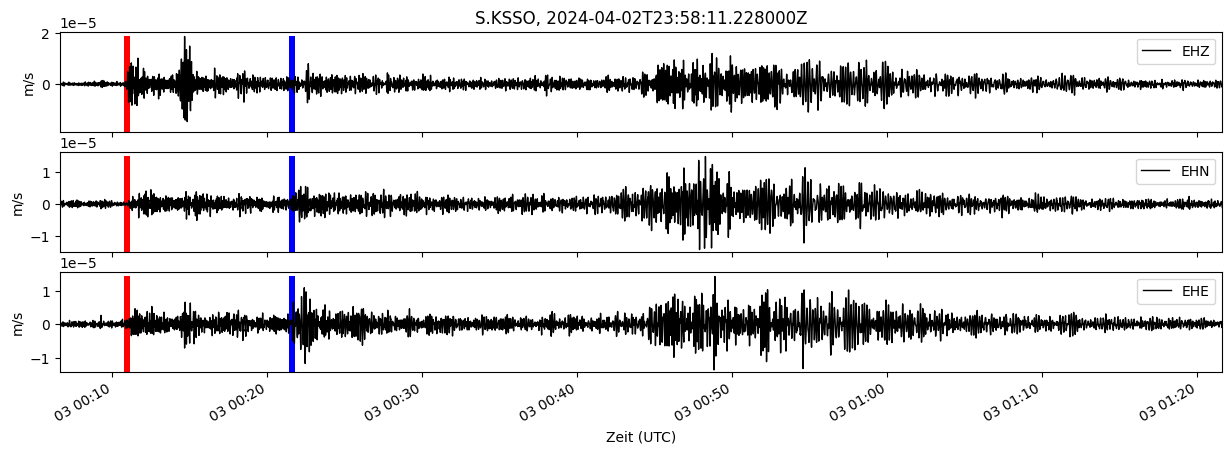

In [ ]:
# @title
# Diesen Code solltest Du nicht verändern:

domain = "time"

try:
  try:
    inv_rs = Client("ETH").get_stations(network="S", station=rs_station[0],
                                        location="--", channel="EH*", level="RESP", starttime=origin_time, endtime=origin_time+24*60*60)
  except:
    inv_rs= Client("RASPISHAKE").get_stations(network="AM", station=rs_station[1],
                                        location="00", channel="EH*", level="RESP", starttime=origin_time, endtime=origin_time+24*60*60)
  sta_lat = inv_rs[0][0].latitude
  sta_lon = inv_rs[0][0].longitude

  epi_dist = gps2dist_azimuth(eq_lat, eq_lon, sta_lat, sta_lon)[0]/1000
  if epi_dist <=110:
    phase_arrivals = model.get_travel_times(source_depth_in_km=max([1.0, eq_depth]),
                                          distance_in_degree=epi_dist/111.111,phase_list=["p","s"])
    p_arr = phase_arrivals[0].time
    s_arr = phase_arrivals[1].time
  elif not model.get_travel_times(source_depth_in_km=max([1.0, eq_depth]),
                                          distance_in_degree=epi_dist/111.111,phase_list=["P"]) == []:
    phase_arrivals = model.get_travel_times(source_depth_in_km=max([1.0, eq_depth]),
                                          distance_in_degree=epi_dist/111.111,phase_list=["P"])

    p_arr = phase_arrivals[0].time
    phase_arrivals = model.get_travel_times(source_depth_in_km=max([1.0, eq_depth]),
                                          distance_in_degree=epi_dist/111.111,phase_list=["S"])
    s_arr = phase_arrivals[0].time
  else:
    phase_arrivals = model.get_travel_times(source_depth_in_km=max([1.0, eq_depth]),
                                          distance_in_degree=epi_dist/111.111)
    p_arr = phase_arrivals[0].time
    s_arr = []



  if epi_dist >= 9000:
    eq_type = "teleseismic"
    freqmin = 0.1
    freqmax = 0.8
    timewindow_start = origin_time + phase_arrivals[0].time - 15 * 60
    timewindow_end = origin_time + phase_arrivals[0].time + 60 * 60
  elif epi_dist >= 600:
    eq_type = "regional"
    freqmin = 0.7
    freqmax = 2.0
    timewindow_start = origin_time + phase_arrivals[0].time - 0.5 * 60
    timewindow_end = origin_time + phase_arrivals[0].time + 5 * 60
  elif epi_dist >= 100:
    eq_type = "local"
    freqmin = 3.0
    freqmax = 8.0
    timewindow_start = origin_time
    timewindow_end = origin_time + 1 * 120
  else:
    eq_type = "hyperlocal"
    freqmin = 3.0
    freqmax = 20.0
    timewindow_start = origin_time
    timewindow_end = origin_time + 1 * 80


  print(rs_station[0] + " ist " + str(round(epi_dist*10)/10) + " km von dem Erdbeben entfernt.")

  try:
    stream = Client("ETH").get_waveforms(network="S", station=rs_station[0], location="--", channel="EH*", starttime=timewindow_start - 60, endtime=timewindow_end + 60, attach_response=True)
  except:
    stream = Client("RASPISHAKE").get_waveforms(network="AM", station=rs_station[1], location="00", channel="EH*", starttime=timewindow_start - 60, endtime=timewindow_end + 60, attach_response=True)
  stream.merge(method=0, fill_value='interpolate')
  stream.detrend()
  if domain == "time":
    stream.filter('bandpass',freqmin=freqmin, freqmax=freqmax, corners=4, zerophase=True)
  stream.remove_response(output='VEL')
  stream.trim(starttime = timewindow_start, endtime = timewindow_end)

  fig = plt.figure()
  for idx, trace in enumerate(stream):
    if trace.stats.channel == "EHZ":
      ax = fig.add_subplot(len(stream),1,1)
      plt.title("S." + rs_station[0] + ", " + str(cat[0].origins[0].time))
    elif trace.stats.channel == "EHN":
      ax = fig.add_subplot(len(stream),1,2)
    else:
      ax = fig.add_subplot(len(stream),1,3)
    if domain == "time":
      ax.xaxis_date()
      ax.plot(trace.times("matplotlib"), trace.data, "k-", linewidth = 1, label = trace.stats.channel)
      plt.bar(origin_time + p_arr, height =  2 * np.abs(trace.max()), bottom = -np.abs(trace.max()), width = (timewindow_end-timewindow_start)/200, align = "center", color = "r")
      if not s_arr == []:
        plt.bar(origin_time + s_arr, height = 2 * np.abs(trace.max()), bottom = -np.abs(trace.max()), width = (timewindow_end-timewindow_start)/200, align = "center", color = "b")
      plt.xlim(timewindow_start, timewindow_end)
      plt.xlabel('Zeit (UTC)')
      plt.ylabel('m/s')
      plt.legend()
    else:
      ax.specgram(trace.data, NFFT = 1024)
      #plt.yscale('log')
    fig.autofmt_xdate()

  fig.set_figheight(5)
  fig.set_figwidth(15)

  print("Die ersten Erdbebenwellen (Kompressionswellen) erreichen die Station nach " + str(round(p_arr*10)/10) + " Sekunden (roter Strich).")
  print("Der blaue Strich zeigt die Ankunftszeit der langsameren S-Wellen (Scherwellen) nach "+ str(round(s_arr*10)/10) + " Sekunden")
  print("Falls Du keine Einsätze siehst, sind die Erschütterungen an Deiner Station vermutlich zu gering. Versuche es noch einmal mit einem stärkeren oder näheren Erdbeben.")
  print("Die Daten sind von " +str(freqmin) + " Hertz (Hz) bis " +str(freqmax) + " Hertz (Hz) gefiltert.")

except:
  print(" ")
  print("Ich habe keine Daten für " + rs_station[0] + " gefunden. Versuche es noch einmal.")

Vergleiche die Seismogramme mit den Aufzeichnungen an der nächsten CH Breitband-Station im  [Schweizerischen Erdbeben-Messnetz](http://www.seismo.ethz.ch/de/earthquakes/monitoring/national-seismic-network/overview/) des SED.

Die nächste Breitband-Station ist CH.MOUTI. Sie ist 17.7 km von KSSO entfernt.


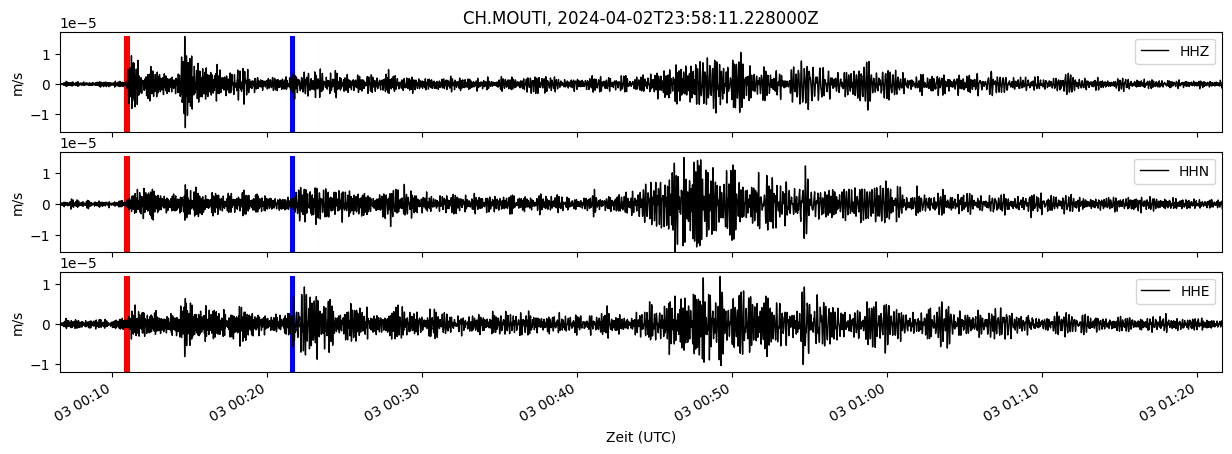

In [ ]:
# @title
# Diesen Code solltest Du nicht verändern:
ch_dist = []
if len(rs_station)<3:
  for idx,sta in enumerate(inv_ch[0]):
    sta_ch_lat = sta.latitude
    sta_ch_lon = sta.longitude
    ch_dist.append(gps2dist_azimuth(sta_ch_lat, sta_ch_lon, sta_lat, sta_lon)[0]/1000)
  nearest_sta = inv_ch[0][np.argmin(ch_dist)].code
  sta_ch_lat = inv_ch[0][np.argmin(ch_dist)].latitude
  sta_ch_lon = inv_ch[0][np.argmin(ch_dist)].longitude
else:
   nearest_sta = rs_station[2]
   inv = Client("ETH").get_stations(network="CH", station=rs_station[2],
                                        location="--", channel="HH*", level="RESP", starttime=origin_time, endtime=origin_time+24*60*60)
   sta_ch_lat = inv[0][0].latitude
   sta_ch_lon = inv[0][0].longitude
   ch_dist.append(gps2dist_azimuth(sta_ch_lat, sta_ch_lon, sta_lat, sta_lon)[0]/1000)


epi_dist_ch = (gps2dist_azimuth(eq_lat, eq_lon, sta_ch_lat, sta_ch_lon)[0]/1000)


if epi_dist_ch <=110:
  phase_arrivals = model.get_travel_times(source_depth_in_km=max([1.0, eq_depth]),
                                        distance_in_degree=epi_dist_ch/111.111,phase_list=["p","s"])
  p_arr = phase_arrivals[0].time
  s_arr = phase_arrivals[1].time
elif not model.get_travel_times(source_depth_in_km=max([1.0, eq_depth]),
                                          distance_in_degree=epi_dist_ch/111.111,phase_list=["P"]) == []:
  phase_arrivals = model.get_travel_times(source_depth_in_km=max([1.0, eq_depth]),
                                        distance_in_degree=epi_dist_ch/111.111,phase_list=["P"])
  p_arr = phase_arrivals[0].time
  phase_arrivals = model.get_travel_times(source_depth_in_km=max([1.0, eq_depth]),
                                        distance_in_degree=epi_dist_ch/111.111,phase_list=["S"])
  s_arr = phase_arrivals[0].time

else:
  phase_arrivals = model.get_travel_times(source_depth_in_km=max([1.0, eq_depth]),
                                        distance_in_degree=epi_dist_ch/111.111)
  p_arr = phase_arrivals[0].time
  s_arr = []


print("Die nächste Breitband-Station ist CH." + nearest_sta + ". Sie ist " +str(round(min(ch_dist)*10)/10) + " km von " + rs_station[0] + " entfernt.")

try:
  stream = Client("ETH").get_waveforms(network="CH", station=nearest_sta, location="--", channel="HH*", starttime = timewindow_start - 60, endtime = timewindow_end + 60, attach_response = True)
  stream.merge(method=0, fill_value='interpolate')
  stream.detrend()
  stream.filter('bandpass',freqmin=freqmin, freqmax=freqmax, corners=4, zerophase=True)
  stream.remove_response(output='VEL', taper = True)
  stream.trim(starttime = timewindow_start, endtime = timewindow_end)

  fig = plt.figure()
  for idx, trace in enumerate(stream):
    if trace.stats.channel == "HHZ":
      ax = fig.add_subplot(len(stream),1,1)
      plt.title("CH." + nearest_sta+ ", " + str(cat[0].origins[0].time))
    elif trace.stats.channel == "HHN":
      ax = fig.add_subplot(len(stream),1,2)
    else:
      ax = fig.add_subplot(len(stream),1,3)
    ax.xaxis_date()
    ax.plot(trace.times("matplotlib"), trace.data, "k-", linewidth = 1, label = trace.stats.channel)
    plt.bar(origin_time + p_arr, height =  2 * np.abs(trace.max()), bottom = -np.abs(trace.max()), width = (timewindow_end-timewindow_start)/200, align = "center", color = "r")
    if not s_arr == []:
      plt.bar(origin_time + s_arr, height = 2 * np.abs(trace.max()), bottom = -np.abs(trace.max()), width = (timewindow_end-timewindow_start)/200, align = "center", color = "b")
    plt.xlim(timewindow_start, timewindow_end)
    plt.xlabel('Zeit (UTC)')
    plt.ylabel('m/s')
    plt.legend()
    fig.autofmt_xdate()
    fig.set_figheight(5)
    fig.set_figwidth(15)
except:
  print("Ich haben leider keine Daten gefunden. Aendere die Parameter und versuche es noch einmal.")

Hier siehst Du, welchen Weg die schnellsten Erdbebenwellen durch die Erde vom Erdbeben (Stern) bis zu Deinem RaspberryShake (Dreieck) zurückgelegt haben.

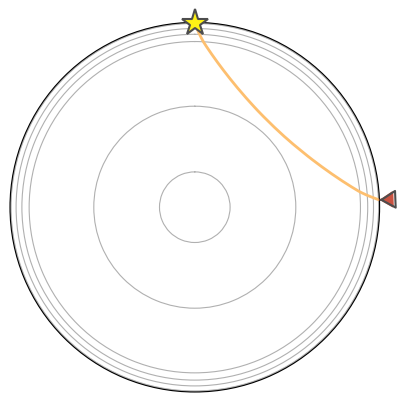

In [ ]:
# @title
# Diesen Code solltest Du nicht verändern:

arrivals = model.get_ray_paths(source_depth_in_km=max([1.0, eq_depth]), distance_in_degree=epi_dist/111.111, phase_list=[phase_arrivals[0].name])
if type == "local":
  ax = arrivals.plot_rays(plot_type="cartesian")
else:
  ax = arrivals.plot_rays()

Es gibt aber auch andere Erdbebenwellen (sogenannte *seismische Phasen*), die sich durch andere Erdschichten ausgebreitet haben und Deine Station später erreichen. Durch das Picken verschiedener Phasen für viele Erdbeben können Seismologen und Seismologinnen die Geschwindigkeiten verschiedener Gesteinsschichten und den Aufbau der Erde bestimmen.

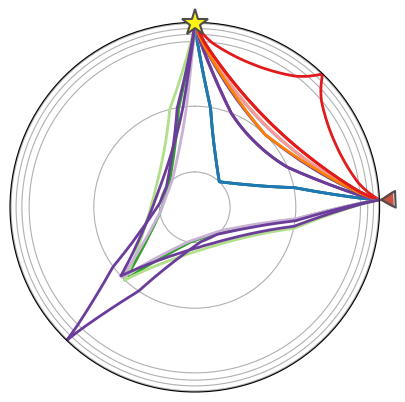

20 arrivals
	P phase arrival at 765.184 seconds
	PcP phase arrival at 766.860 seconds
	pP phase arrival at 776.215 seconds
	sP phase arrival at 780.470 seconds
	PP phase arrival at 970.721 seconds
	PKiKP phase arrival at 1067.940 seconds
	pPKiKP phase arrival at 1079.327 seconds
	sPKiKP phase arrival at 1083.506 seconds
	SKS phase arrival at 1389.710 seconds
	pSKS phase arrival at 1404.792 seconds
	S phase arrival at 1405.190 seconds
	sSKS phase arrival at 1409.105 seconds
	ScS phase arrival at 1411.142 seconds
	pS phase arrival at 1419.487 seconds
	sS phase arrival at 1424.038 seconds
	PKIKKIKP phase arrival at 1825.304 seconds
	PKKP phase arrival at 1831.751 seconds
	SKIKKIKP phase arrival at 2036.733 seconds
	SKKP phase arrival at 2047.237 seconds
	PKIKPPKIKP phase arrival at 2319.770 seconds


In [ ]:
# @title
# Diesen Code solltest Du nicht verändern:

arrivals = model.get_ray_paths(source_depth_in_km=max([1.0, eq_depth]), distance_in_degree=epi_dist/111.111, phase_list=["ttbasic"])
if type == "local":
  ax = arrivals.plot_rays(plot_type="cartesian")
else:
  ax = arrivals.plot_rays()
print(arrivals)

Klicke den nächsten Pfeil am linken Rand, um die Seismogramme von allen seismo-at-school Sensoren zu laden und darzustellen.

Ich habe keine Seismogramme für GOBZL gefunden.


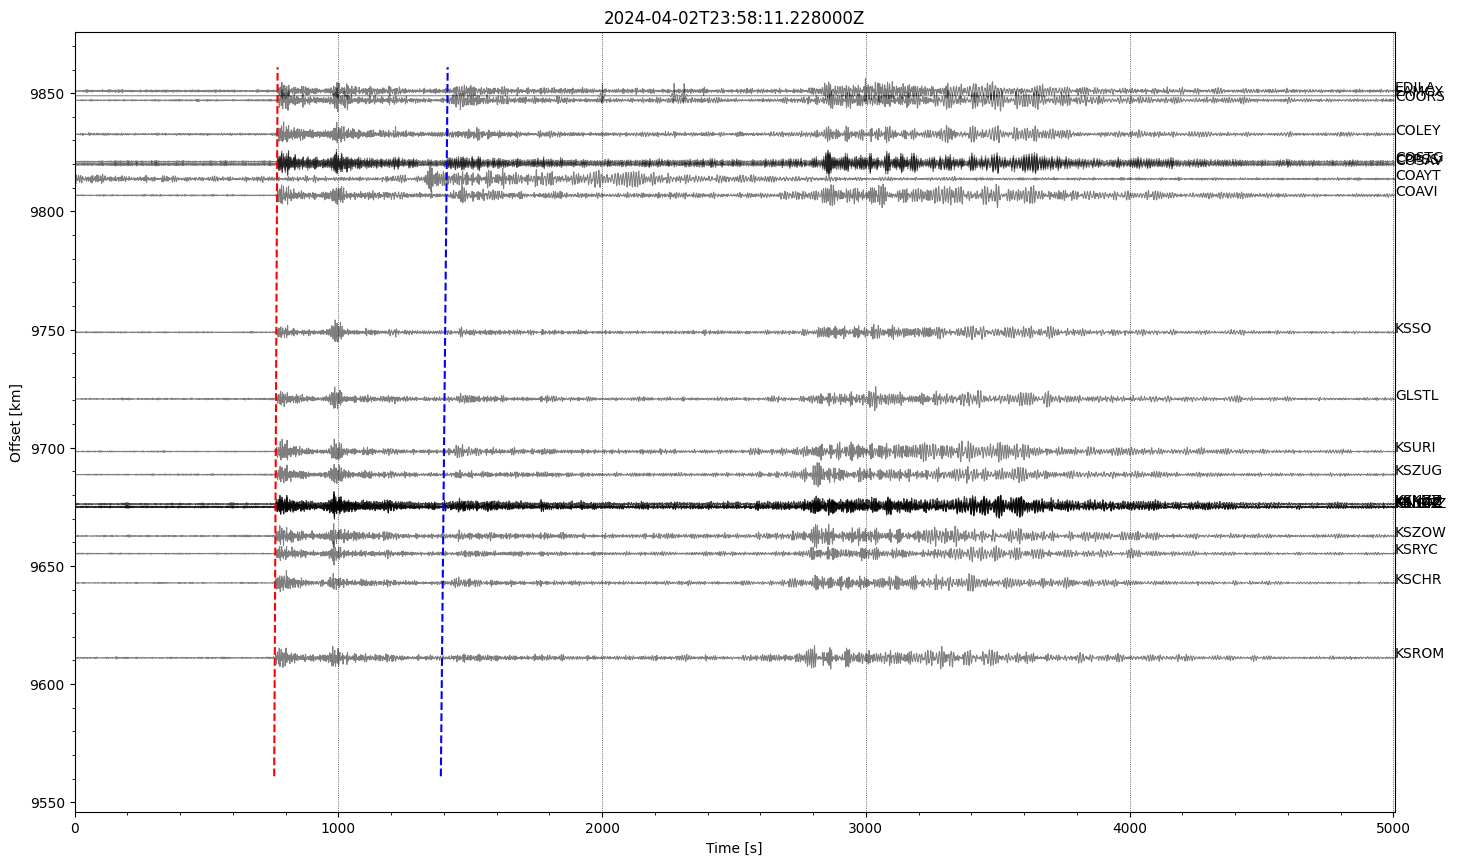

In [ ]:
# @title
# Diesen Code solltest Du nicht verändern:
vp = 5.8 # km/s P-wave velocity
vs = 3.4 # km/s S-wave velocity

try:
  for network in ["S"]:
    if network == "CH":
      inventory = inv_ch
    else:
      inventory = inv_s
    stream = Stream()
    distance = []
    name = []
    for idx, inv in enumerate(inventory[0]):
      try:
        station = inv.code
        trace = Client("ETH").get_waveforms(network=network, station=station, location="--", channel="*Z", starttime=origin_time -60, endtime=timewindow_end +60, attach_response=True)
        trace.merge()
        distance.append(gps2dist_azimuth(inv.latitude, inv.longitude, eq_lat, eq_lon)[0])
        name.append(station)
        stream += trace
      except:
        print("Ich habe keine Seismogramme für " +str(station) + " gefunden.")

    stream.remove_response(output='VEL')
    stream.filter('bandpass',freqmin=freqmin, freqmax=freqmax, corners=4, zerophase=True)
    stream.trim(starttime = origin_time, endtime = timewindow_end)

    for idx, trace in enumerate(stream):
      trace.stats.distance = distance[idx]
      trace.stats.station = name[idx]

    fig = plt.figure()
    stream.plot(type='section', orientation='horizontal', right_vertical_labels=True, linewidth=.75, grid_linewidth=.5, scale=0.75, show=True, fig=fig,
                localization_dict={'Time [s]': 'Zeit [s]', 'Offset [km]': 'Entfernung [km]'})
    fig.set_figheight(10)
    fig.set_figwidth(15)
    plt.title(str(cat[0].origins[0].time))

    if min(distance)/1000 < 150:
      time_axis = np.arange(0, int(timewindow_end-origin_time), 1)
      plt.plot(time_axis,np.sqrt(pow(time_axis * vp,2)-pow(eq_depth,2)),'r') # P-wave
      plt.plot(time_axis,np.sqrt(pow(time_axis * vs,2)-pow(eq_depth,2)),'b') # S-wave
      plt.ylim(0,max(distance) /1000 * 1.25)
    else:
      dist_axis = np.arange(int(min(distance)/1000-50), int(max(distance)/1000+50), 50)
      p_arr = []
      s_arr = []

      for dist in dist_axis:
        if not model.get_travel_times(source_depth_in_km=max([1.0, eq_depth]),
                                          distance_in_degree=dist/111.111,phase_list=["P"]) == []:
          phase_arrivals = model.get_travel_times(source_depth_in_km=max([1.0, eq_depth]),
                                          distance_in_degree=dist/111.111,phase_list=["P"])
          p_arr.append([phase_arrivals[0].time, dist])
          phase_arrivals = model.get_travel_times(source_depth_in_km=max([1.0, eq_depth]),
                                          distance_in_degree=dist/111.111,phase_list=["S"])
          s_arr.append([phase_arrivals[0].time, dist])
        else:
          phase_arrivals = model.get_travel_times(source_depth_in_km=max([1.0, eq_depth]),
                                         distance_in_degree=dist/111.111)
          p_arr.append([phase_arrivals[0].time, dist])
          s_arr.append([[], dist])

      plt.plot(np.array(p_arr)[:,0],np.array(p_arr)[:,1],'r--') # P-wave
      if not np.array(s_arr)[0,0] == []:
        plt.plot(np.array(s_arr)[:,0],np.array(s_arr)[:,1],'b--') # S-wave

    for idx, trace in enumerate(stream):
      plt.text((timewindow_end - origin_time)+1, trace.stats.distance /1000, str(trace.stats.station))


except:
  print("Ich habe leider keine Daten gefunden.")

Hier siehst Du alle Schul-Seismometer in der Schweiz.

In [ ]:
# @title
# Diesen Code solltest Du nicht verändern:

fig = plt.figure()
inv_s.plot(projection="local", resolution="f", show=True, size=13)
fig.set_figheight(100)
fig.set_figwidth(150)
plt.show()
print(inv_s[0])

ImportError: Cartopy could not be imported.

<Figure size 640x480 with 0 Axes>

Und mit Hilfe des nächsten Codes kannst Du Dir ein 24-Stunden-Seismogramm für Deinen Sensor anschauen.

In [ ]:
# @title
# Diesen Parameter kannst Du ändern:

start_day = UTCDateTime(origin_time._get_date())

#start_day = obspy.UTCDateTime("2024-04-20T00:00:00.000Z")
#rs_station = ["KSSO","RFE6B"]    # KS Solothurn, bernhard.marti@ksso.ch, nathalie.meier@ksso.ch
#rs_station = ["MNGRZ","R7DBB"]  # MNG Rämibühl, philipp.ruedisuehli@mng.ch
#rs_station = ["KSZUG","R3BE0"]  # KS Zug, Martin.Rohmann@ksz.ch
#rs_station = ["KSCHR","RB22F"]  # Bündner KS Chur, Stefan.reusser@bks-campus.ch
#rs_station = ["KSRYC","RF726"]  # KS Rychenberg Winterthur, David Guntli (Geographie), gg.sammlung@gmail.com; IT: andreas.berger@krw.ch
#rs_station = ["KSKNZ","RC23B"]  # previously: "KKNZH"; KS Küsnacht, thierry.joerin@kkn.ch
#rs_station = ["KSHOZ","RE5E7"]  # KS Hottingen	Zürich, irene.meier@ksh.ch
#rs_station = ["KSURI","R8F49"]  # KS Uri, adrian.zgraggen@kmsu.ch
#rs_station = ["KSROM","R58D2"]  # KS Romanshorn, Karin Keller, klk@ksr.ch -- NEW LOCATION????
#rs_station = ["KSZOW","RF726"]  # KS Zürcher Oberland, Wetzikon, silvan.rusch@kzo.ch
#rs_station = ["GBIEL","R8C09"]  # OFFLINE Gymnasium Biel-Seeland	Biel, sabrina.rupp@gbsl.ch
#rs_station = ["GUSTZ","R4335"]  # previsously: "KSUSZ"; Gymnasium Unterstrass, stefan.hesske@unterstrass.edu
#rs_station = ["KSENZ","RD3C4"]  # OFFLINE Kantonsschule Enge Zürich, ursina.gloor@ken.ch
#rs_station = ["KSOBW","RDFB5"]  # OFFLINE Gymnasium Oberwil, aideen.mitterer-oeri@sbl.ch
#rs_station = ["GOBZL","R19BB"]  # Gymnasium Oberaargau, Stefan.Naef@bzl.ch
#rs_station = ["GLSTL","RDFB5"] # Gymnasium Liestal, peter.abegglen@sbl.ch

0.1


Text(0.5, 1.0, 'S.KSSO AM.RFE6B, 2024-04-02T00:00:00.000000Z')

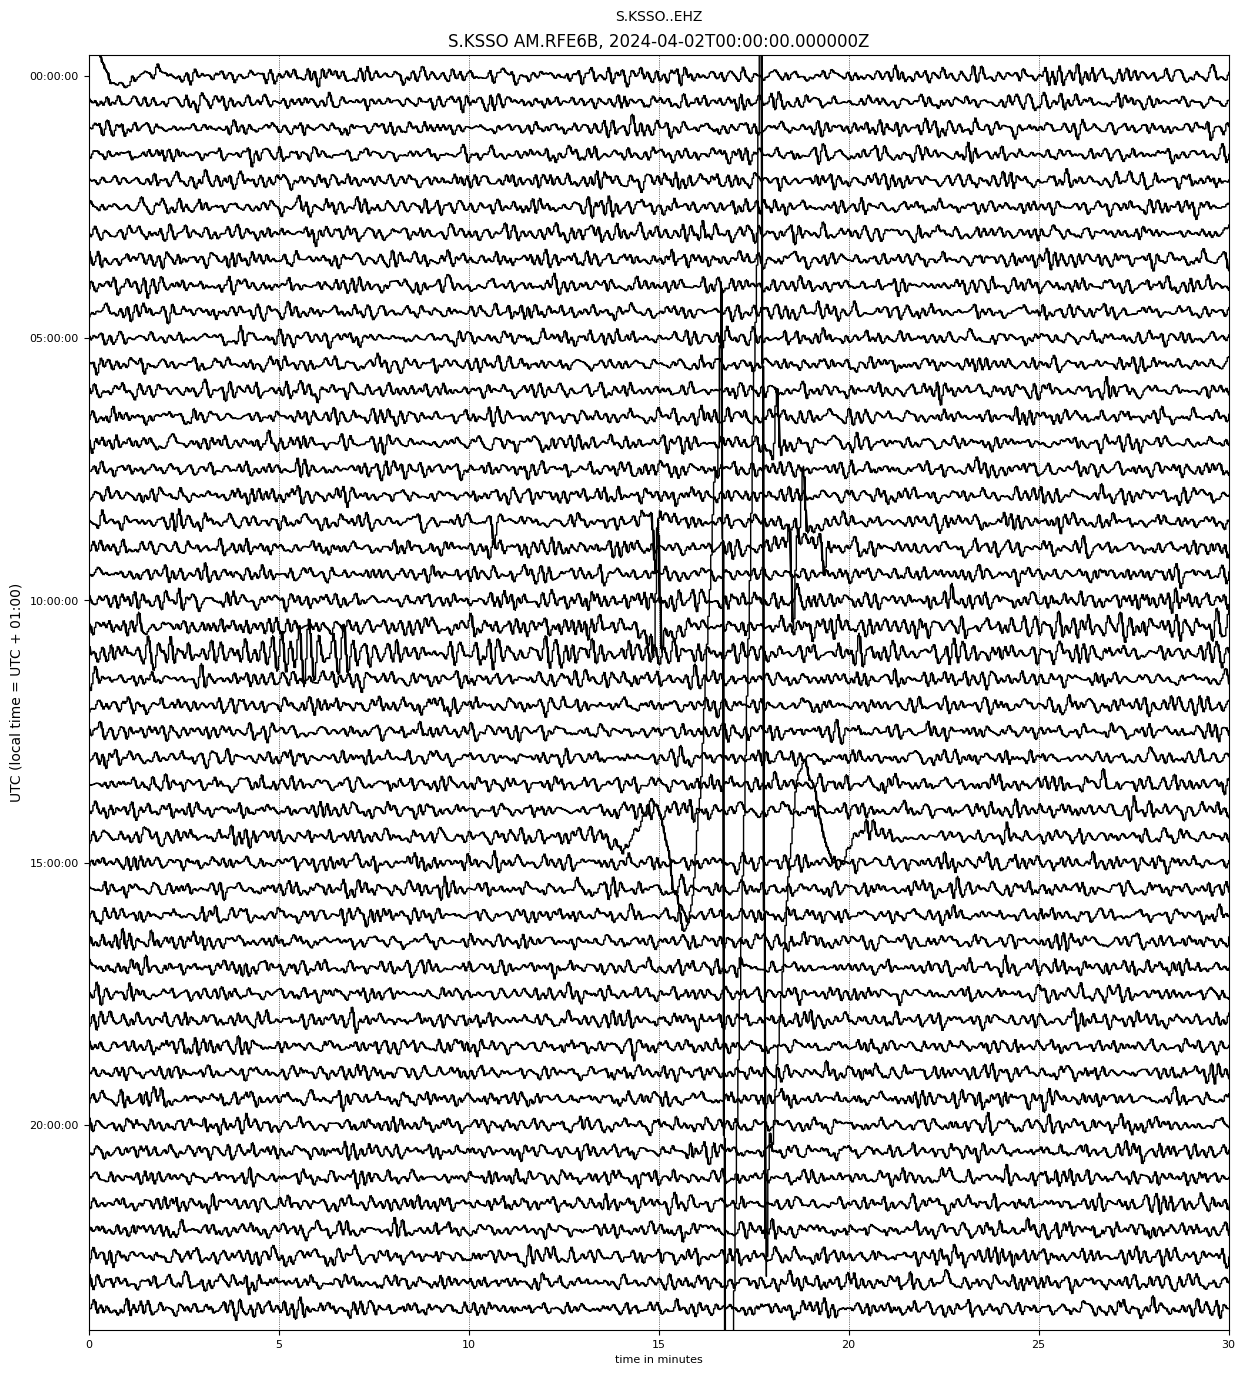

In [ ]:
# @title
# Diesen Code solltest Du nicht verändern:

#rs_station = ["MOUTI","MOUTI"]  #
print(freqmin)
freqmin = 0.01
freqmax = 0.1
try:
  singlechannel = Client("ETH").get_waveforms(network="S", station=rs_station[0], location="--", channel="EHZ", starttime=start_day, endtime=start_day + 24*60*60, attach_response=True)
  #singlechannel = Client("ETH").get_waveforms(network="CH", station=rs_station[0], location="--", channel="HHZ", starttime=start_day, endtime=start_day + 24*60*60, attach_response=True)
except:
  singlechannel = Client("RASPISHAKE").get_waveforms(network="AM", station=rs_station[1], location="00", channel="EHZ", starttime=start_day, endtime=start_day + 24*60*60, attach_response=True)
singlechannel.merge(method=0, fill_value='interpolate')
singlechannel.detrend()
singlechannel.filter('bandpass',freqmin=freqmin, freqmax=freqmax, corners=4, zerophase=True)
#  singlechannel.remove_response(output='VEL')

fig = plt.figure()
singlechannel[0].plot(type='dayplot', interval=30, timezone='local time', time_offset=1, color='k',fig=fig)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.title("S." + str(rs_station[0]) + " AM." + str(rs_station[1]) + ", " + str(start_day))